In [ ]:
!pip install simpledorff

In [2]:
import simpledorff
import pandas as pd
import numpy as np

### *levels of measurement


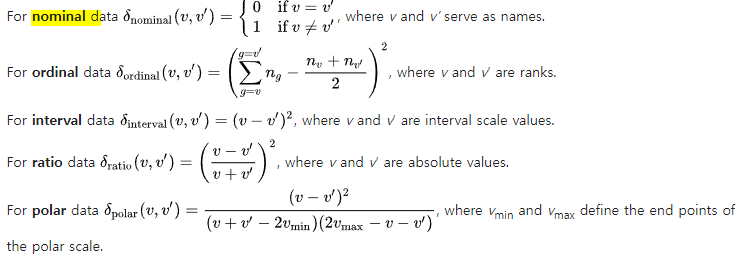

In [3]:
def nominal_metric(a, b):
    return a != b

In [4]:
def sorting(df, img_name_col, annotators_name):  # img_name_col : df에서 img_file_name이 있는 열 이름
    img_names = []
    annotators = []
    annotations = []
    sorting_data = pd.DataFrame()
    
    for i in range(len(df)):
        
        # img_id
        img_name = data[img_name_col][i]
        for j in range(len(annotators_name)):
            img_names.append(img_name)
        
        # annotator_id & annotations
        for name in annotators_name:
            annotators.append(name)
            annotations.append(df[name][i])
        
    sorting_data['img_id'] = img_names
    sorting_data['annotator_id'] = annotators
    sorting_data['annotation'] = annotations
    
    return sorting_data

In [5]:
data = pd.read_excel('./krippendorff.xlsx')
data

,img,KIS,LYI,KJM
0,11,1,2,2
1,21,3,3,3
2,31,2,2,2
3,41,1,1,0
4,51,1,1,1
...,...,...,...,...
115,1166,0,0,0
116,1176,3,2,2
117,1186,2,2,2
118,1196,3,2,2


In [14]:
annotator = data.columns.drop(['img'])
annotator

Index(['KIS', 'LYI', 'KJM'], dtype='object')

In [15]:
sorting_data = sorting(data, img_name_col='img', annotators_name=annotator)
sorting_data

,img_id,annotator_id,annotation
0,11,KIS,1
1,11,LYI,2
2,11,KJM,2
3,21,KIS,3
4,21,LYI,3
...,...,...,...
355,1196,LYI,2
356,1196,KJM,2
357,1206,KIS,3
358,1206,LYI,2


In [11]:
simpledorff.calculate_krippendorffs_alpha_for_df(sorting_data, experiment_col='img_id',
                                                 annotator_col='annotator_id',
                                                 class_col='annotation', metric_fn=nominal_metric)

0.7530537374411139